Modified from https://github.com/ritvikmath/Time-Series-Analysis/blob/master/Time%20Series%20Data%20Preprocessing.ipynb

In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Read the Data

In [3]:
def parser(s):
    return datetime.strptime(s, '%Y-%m')

In [5]:
ice_cream_heater_df = pd.read_csv('data/ice_cream_vs_heater.csv', parse_dates=[0], index_col=0, date_parser=parser)

C:\Users\salmank\AppData\Local\Temp\ipykernel_11420\1193472615.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ice_cream_heater_df = pd.read_csv('data/ice_cream_vs_heater.csv', parse_dates=[0], index_col=0, date_parser=parser)


In [6]:
ice_cream_heater_df = ice_cream_heater_df.asfreq(pd.infer_freq(ice_cream_heater_df.index))

In [7]:
heater_series = ice_cream_heater_df.heater

In [8]:
heater_series

Month
2004-01-01    27
2004-02-01    18
2004-03-01    14
2004-04-01    13
2004-05-01    13
              ..
2020-02-01    34
2020-03-01    25
2020-04-01    25
2020-05-01    27
2020-06-01    24
Freq: MS, Name: heater, Length: 198, dtype: int64

In [9]:
def plot_series(series):
    plt.figure(figsize=(12,6))
    plt.plot(heater_series, color='red')
    plt.ylabel('Search Frequency for "Heater"', fontsize=16)

    for year in range(2004, 2021):
        plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

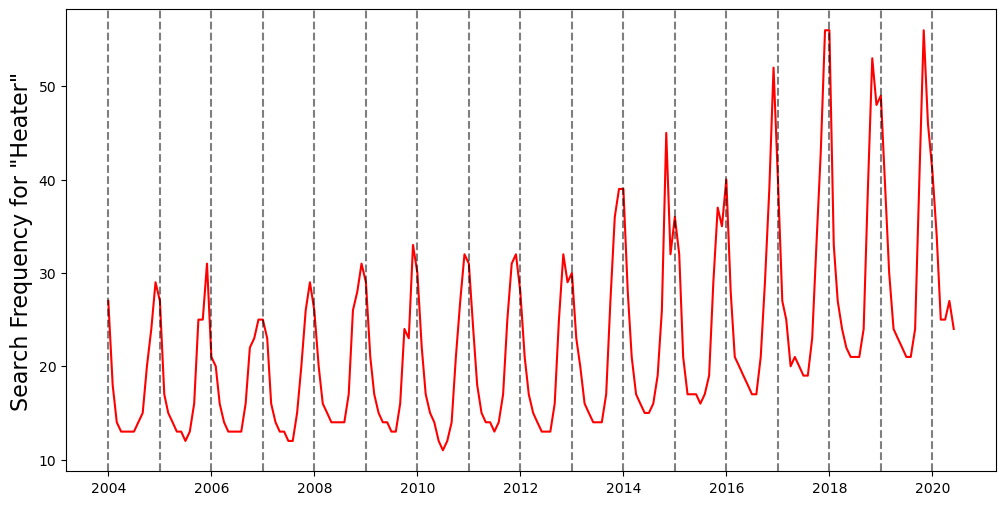

In [10]:
plot_series(heater_series)

# Normalize

In [11]:
avg, dev = heater_series.mean(), heater_series.std()

In [12]:
heater_series = (heater_series - avg) / dev

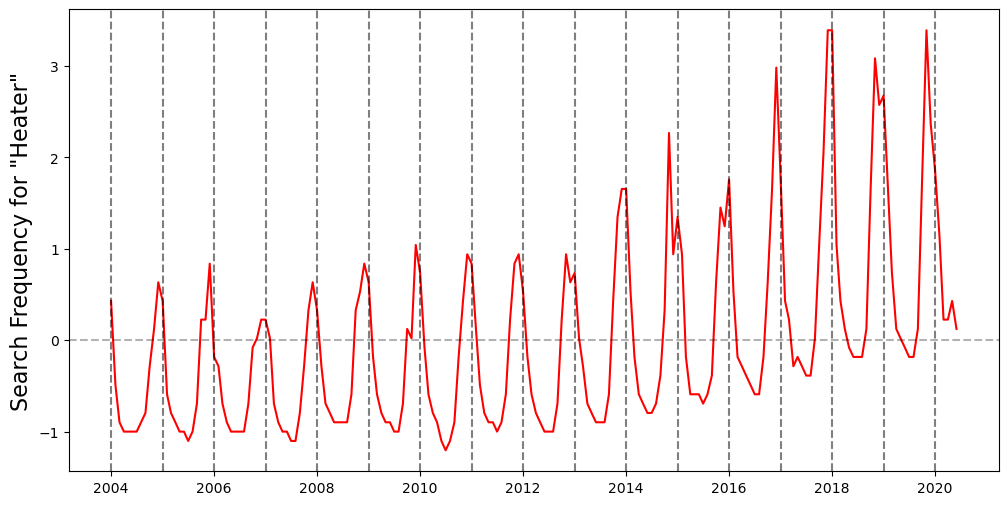

In [13]:
plot_series(heater_series)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

# Take First Difference to Remove Trend

In [14]:
heater_series = heater_series.diff().dropna()

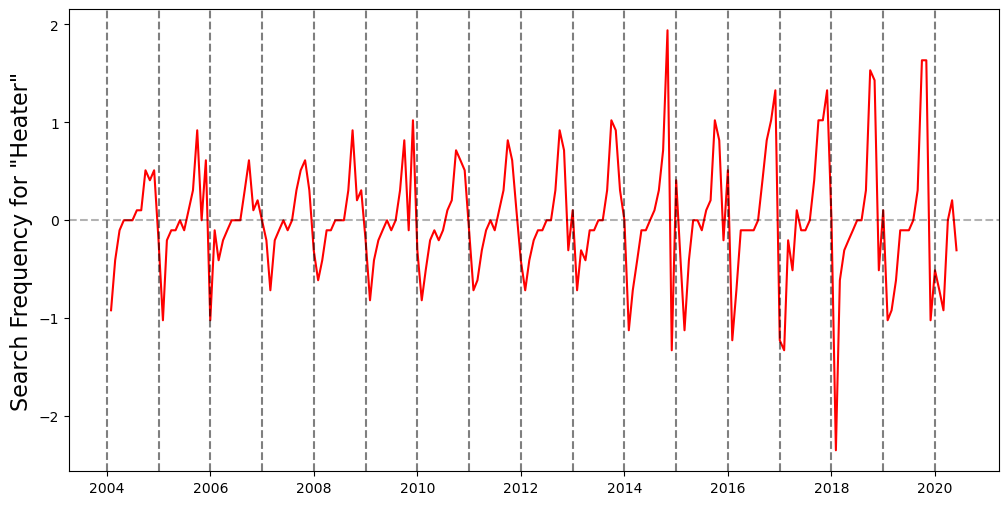

In [15]:
plot_series(heater_series)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

# Remove Increasing Volatility

In [16]:
annual_volatility = heater_series.groupby(heater_series.index.year).std()

In [17]:
annual_volatility

Month
2004    0.415481
2005    0.474527
2006    0.400148
2007    0.359839
2008    0.396182
2009    0.499810
2010    0.459566
2011    0.443924
2012    0.471104
2013    0.503587
2014    0.855743
2015    0.569441
2016    0.719843
2017    0.830886
2018    0.987221
2019    0.892991
2020    0.426657
Name: heater, dtype: float64

In [18]:
heater_annual_vol = heater_series.index.map(lambda d: annual_volatility.loc[d.year])

In [19]:
heater_annual_vol

Index([0.41548104705328837, 0.41548104705328837, 0.41548104705328837,
       0.41548104705328837, 0.41548104705328837, 0.41548104705328837,
       0.41548104705328837, 0.41548104705328837, 0.41548104705328837,
       0.41548104705328837,
       ...
        0.8929910269067829,  0.8929910269067829,  0.8929910269067829,
        0.8929910269067829, 0.42665652301411994, 0.42665652301411994,
       0.42665652301411994, 0.42665652301411994, 0.42665652301411994,
       0.42665652301411994],
      dtype='float64', name='Month', length=197)

In [20]:
heater_series = heater_series / heater_annual_vol

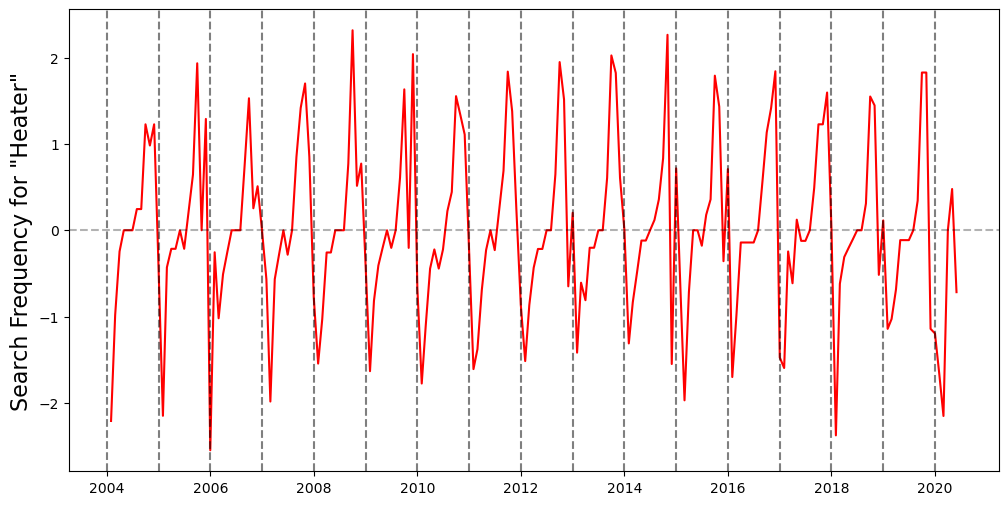

In [21]:
plot_series(heater_series)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

# Remove Seasonality

In [22]:
month_avgs = heater_series.groupby(heater_series.index.month).mean()

In [23]:
month_avgs

Month
1    -0.428360
2    -1.483129
3    -1.063595
4    -0.442926
5    -0.121663
6    -0.128425
7    -0.107093
8     0.075720
9     0.544638
10    1.613170
11    1.183118
12    0.491641
dtype: float64

In [24]:
heater_month_avg = heater_series.index.map(lambda d: month_avgs.loc[d.month])

In [25]:
heater_month_avg

Index([ -1.4831292771766649,  -1.0635953355687688,  -0.4429263710136824,
       -0.12166261572164781, -0.12842542811874377, -0.10709260508002622,
        0.07572031336904021,   0.5446384049209761,   1.6131699911888608,
         1.1831180641276995,
       ...
         0.5446384049209761,   1.6131699911888608,   1.1831180641276995,
         0.4916411242912192,  -0.4283597874466263,  -1.4831292771766649,
        -1.0635953355687688,  -0.4429263710136824, -0.12166261572164781,
       -0.12842542811874377],
      dtype='float64', name='Month', length=197)

In [26]:
heater_series = heater_series - heater_month_avg

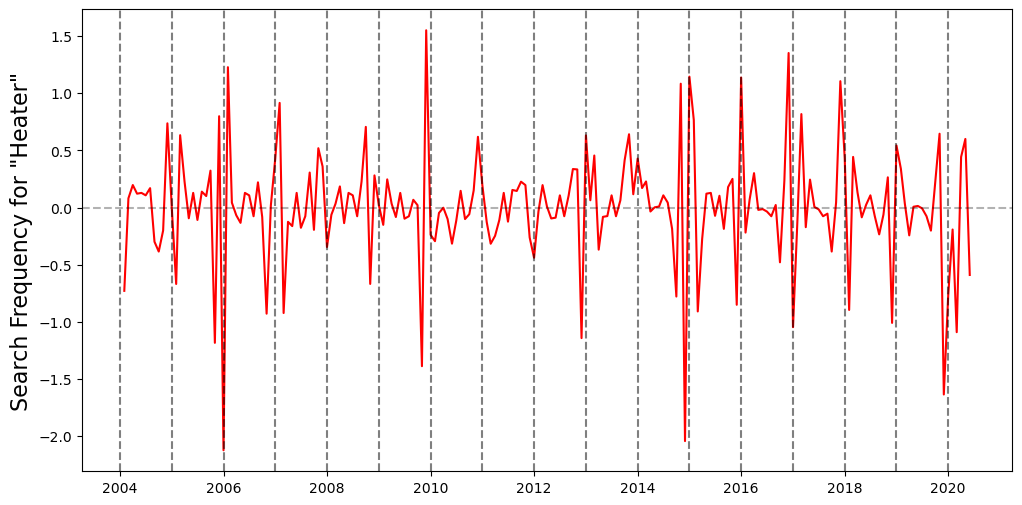

In [27]:
plot_series(heater_series)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)